In [3]:
from shapely import wkt
from shapely.geometry import Point
from shapely.geometry import mapping
from pyproj import Transformer
import geopandas as gpd
import pandas as pd
import requests

Dropdown(description='Year:', index=2, options=(2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019), v…

Plotting maps for year: 2012
Rows in flow_data for year 2012: 99
Rows in load_data for year 2012: 99


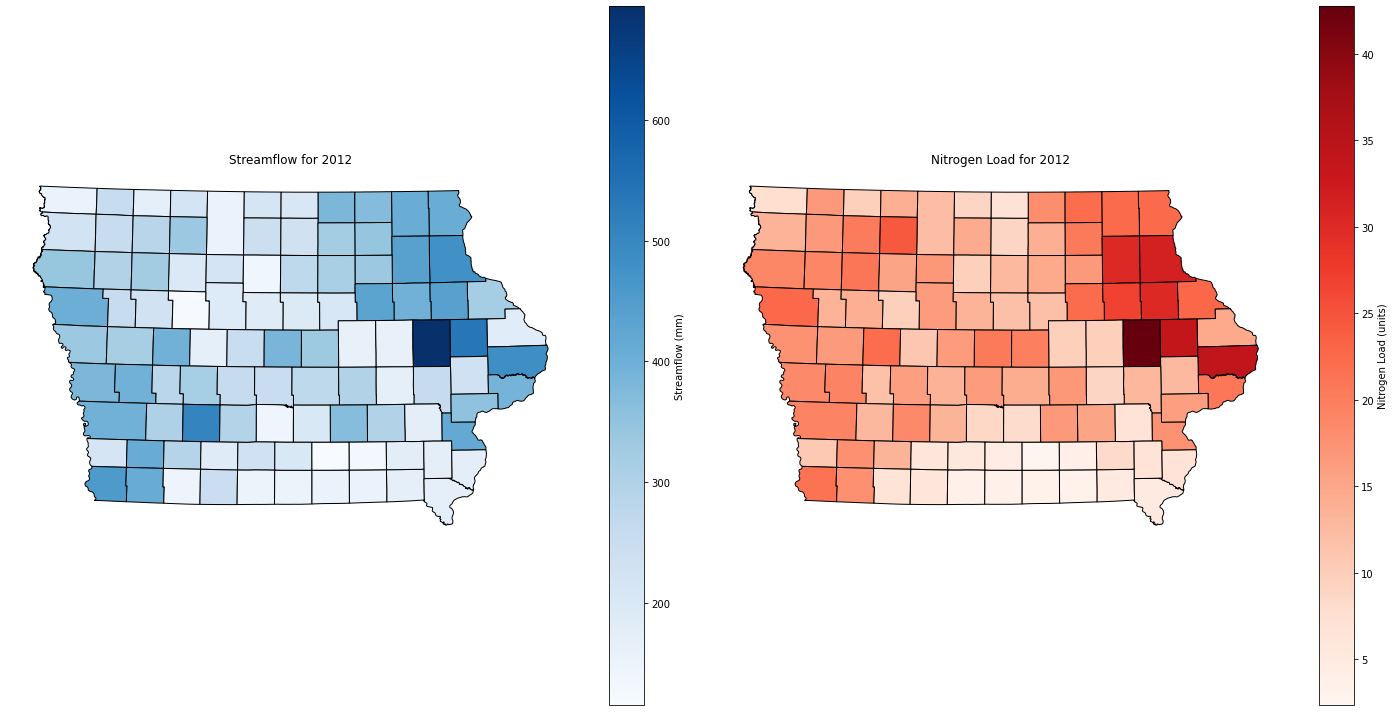

In [4]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import geopandas as gpd


# Load the yearly data
counties_with_flow_yearly = pd.read_csv('counties_with_flow_yearly.csv')  # Yearly streamflow
counties_with_load = pd.read_csv('counties_with_load_yearly.csv')  # Yearly load

# Ensure no NaN values and convert types
counties_with_flow_yearly = counties_with_flow_yearly.dropna(subset=['Year'])
counties_with_flow_yearly['Year'] = counties_with_flow_yearly['Year'].astype(int)

counties_with_load = counties_with_load.dropna(subset=['Year'])
counties_with_load['Year'] = counties_with_load['Year'].astype(int)

# Debug: Print unique years in both datasets
print("Unique years in counties_with_flow_yearly:", sorted(counties_with_flow_yearly['Year'].unique()))
print("Unique years in counties_with_load:", sorted(counties_with_load['Year'].unique()))

# Explicitly convert WKT strings in 'geometry' column to shapely geometry objects
counties_with_flow_yearly['geometry'] = counties_with_flow_yearly['geometry'].apply(wkt.loads)
counties_with_load['geometry'] = counties_with_load['geometry'].apply(wkt.loads)

# Create GeoDataFrames using the explicitly converted geometry column
counties_with_flow_yearly = gpd.GeoDataFrame(
    counties_with_flow_yearly,
    geometry='geometry'
)

counties_with_load = gpd.GeoDataFrame(
    counties_with_load,
    geometry='geometry'
)

# Find common years in both datasets
common_years = sorted(set(counties_with_flow_yearly['Year'].unique()) & set(counties_with_load['Year'].unique()))

# Widget for Year
year_widget = widgets.Dropdown(
    options=common_years,
    value=common_years[0],
    description='Year:',
)

def plot_maps(year):
    """
    Function to plot two maps side by side: Streamflow on the left, Load on the right.
    """
    # Debug: Print the selected year
    print(f"Plotting maps for year: {year}")

    # Filter data for the selected year
    flow_data = counties_with_flow_yearly[counties_with_flow_yearly['Year'] == year]
    load_data = counties_with_load[counties_with_load['Year'] == year]

    # Debug: Check the number of rows after filtering
    print(f"Rows in flow_data for year {year}: {len(flow_data)}")
    print(f"Rows in load_data for year {year}: {len(load_data)}")

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Plot Streamflow map on the left
    flow_data.plot(ax=ax1, column='total_streamflow', cmap='Blues', legend=True,
                   edgecolor='black', legend_kwds={'label': "Streamflow (mm)"})
    ax1.set_title(f'Streamflow for {year}')  # Ensure title matches selected year
    ax1.set_axis_off()

    # Plot Load map on the right
    load_data.plot(ax=ax2, column='loading_kgha', cmap='Reds', legend=True,
                   edgecolor='black', legend_kwds={'label': "Nitrogen Load (units)"})
    ax2.set_title(f'Nitrogen Load for {year}')  # Ensure title matches selected year
    ax2.set_axis_off()

    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Force close the figure to prevent overlap with old plots

def on_value_change(change):
    """
    Handler function for when the year widget selection changes.
    """
    clear_output(wait=True)
    display(year_widget)
    plot_maps(change['new'])

# Bind the handler to the widget
year_widget.observe(on_value_change, names='value')

# Display the initial setup
display(year_widget)
plot_maps(year_widget.value)